In [1]:
import numpy as np
import os, sys
sys.path.append('environments/')
from generate_pendulum_tuples import tuples
import numpy as np
import pandas as pd
import random
import pickle, os, csv, math, time, joblib
from joblib import Parallel, delayed
import datetime as dt
from datetime import date, datetime, timedelta
from collections import Counter
import copy as cp
import tqdm
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score, accuracy_score
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
import collections 
#import shap
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
np.seterr(all="ignore")
import matplotlib.pyplot as plt
import tqdm
import math
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import json
import util as util_fqi
import sys
sys.path.append('models/')
from lmmfqi import LMMFQIagent
from fqi import FQIagent
from cfqi import CFQIagent
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from os.path import join as pjoin
from pendulum import PendulumEnv

# Generate pendulum data

In [4]:
bg_tuples, fg_tuples = tuples()
all_tuples = bg_tuples + fg_tuples
random.shuffle(all_tuples)
split = 0.8
train_tuples = all_tuples[:int(split*len(all_tuples))]
test_tuples = all_tuples[int(split*len(all_tuples)):]

# Train Agents

/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

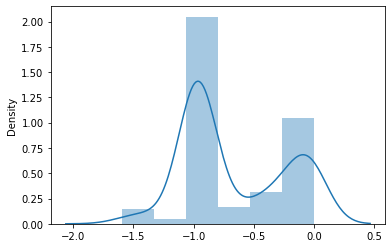

In [5]:
training_set, test_set = util_fqi.construct_dicts(train_tuples, test_tuples)
sns.distplot(training_set['r'])

Learning policy
Run 0 :
Initialize: get batch, set initial Q
Optimization terminated successfully.
         Current function value: 0.001051
         Iterations: 41
         Function evaluations: 473
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.000541
         Iterations: 43
         Function evaluations: 495
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.028676
         Iterations: 73
         Function evaluations: 825
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001362
         Iterations: 35
         Function evaluations: 418
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000164
         Iterations: 35
         Function evaluations: 396
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.0

Optimization terminated successfully.
         Current function value: 0.000238
         Iterations: 43
         Function evaluations: 495
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.000174
         Iterations: 52
         Function evaluations: 605
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 0.013843
         Iterations: 34
         Function evaluations: 385
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.001757
         Iterations: 40
         Function evaluations: 473
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.000220
         Iterations: 45
         Function evaluations: 517
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.000407
         Iterations: 42
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 0.000173
         Iterations: 46
         Function evaluations: 517
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.002660
         Iterations: 37
         Function evaluations: 429
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000164
         Iterations: 34
         Function evaluations: 396
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.002795
         Iterations: 35
         Function evaluations: 407
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000385
         Iterations: 38
         Function evaluations: 451
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 0.000558
         Iterations: 33
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 0.000210
         Iterations: 34
         Function evaluations: 407
         Gradient evaluations: 37
Learn policy
Opta:  [0 0 0 0 4 0 4 4 0 4 0 4 0 4 4 0 4 0 0 0 4 0 0 4 0 4 0 4 4 4 4 0 4 4 0 4 0
 0 4 0 4 4 4 4 4 4 0 0 4 4 4 4 0 4 4 0 0 0 4 4 4 0 0 0 0 4 0 0 4 0 4 0 0 4
 0 4 0 4 4 4 0 0 0 0 0 4 0 0 4 0 4 4 4 4 0 0 4 4 4 0 4 4 4 4 4 0 4 0 4 4 0
 0 0 0 4 0 4 4 4 0 4 4 0 0 0 0 0 4 4 0 0 0 0 0 4 4 4 0 4 4 4 4 0 0 4 4 0 0
 4 0 0 0 4 4 4 4 0 0 0]
Optimization terminated successfully.
         Current function value: 3.640104
         Iterations: 59
         Function evaluations: 567
         Gradient evaluations: 63


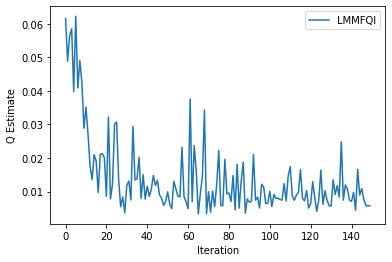

In [6]:
lmm_agent = LMMFQIagent(train_tuples=train_tuples, test_tuples=test_tuples, gamma=0.05, state_dim=3, batch_size=15)
Q_dist = lmm_agent.runFQI(repeats=1)
plt.plot(Q_dist, label= "LMMFQI")
plt.xlabel("Iteration")
plt.ylabel("Q Estimate")
plt.legend()
plt.show()

In [ ]:
cfqi_agent = CFQIagent(train_tuples=train_tuples, test_tuples=test_tuples, state_dim=3, batch_size=25)
Q_dist = cfqi_agent.runFQI(repeats=10)
plt.plot(Q_dist, label= "CFQI")
plt.xlabel("Iteration")
plt.ylabel("Q Estimate")
plt.legend()
plt.show()

In [ ]:
fqi_agent = FQIagent(train_tuples=train_tuples, test_tuples=test_tuples, state_dim=3, batch_size=10)
Q_dist = fqi_agent.runFQI(repeats=10)
plt.plot(Q_dist, label= "FQI")
plt.xlabel("Iteration")
plt.ylabel("Q Estimate")
plt.legend()
plt.show()

# Validation

In [ ]:
# step returns next state and reward

In [ ]:
# FQI, CFQI, LMMFQI, Oracle, Random
algos = ['fqi', 'cfqi', 'lmmfqi', 'oracle', 'random']
overall_reward = {}
mu, sigma = 0, 4
for alg in algos:
    overall_reward[alg] = []
    
num_val = 100
raw_fqi = []
raw_lmmfqi = []
raw_cfqi = []

In [ ]:
for i in range(num_val):

    val_rewards = {}
    for alg in algos:
        val_rewards[alg] = []
        
    bg_tuples, fg_tuples = tuples()
    
    # Generate all of the tuples for this patient
    for i in range(util_fqi.num_samples):
        s = s.T
        # FQI agent
        fqi_action = fqi_agent.piE.predict(s)
        raw_fqi.append(fqi_action)
        #if fqi_action[0] > 3:
        #    fqi_action[0] = 3
        fqi_action = util_fqi.actions[round(fqi_action[0])]
        fqi_action = np.reshape(fqi_action, (2, 1))
        s_a = np.concatenate((s.T, fqi_action))
        val_rewards['fqi'].append(np.dot(util_fqi.reward_function.T, s_a)[0])


        # CFQI agent
        cfqi_action = cfqi_agent.piE.predict(s)
        raw_cfqi.append(cfqi_action)
        #if cfqi_action[0] > 3:
        #    cfqi_action[0] = 3
        cfqi_action = util_fqi.actions[round(cfqi_action[0])]
        cfqi_action = np.reshape(cfqi_action, (2, 1))
        s_a = np.concatenate((s.T, cfqi_action))
        val_rewards['cfqi'].append(np.dot(util_fqi.reward_function.T, s_a)[0])
        
        # LMMFQI agent
        lmmfqi_action = lmm_agent.piE.predict(s)
        raw_lmmfqi.append(lmmfqi_action)
        #if lmmfqi_action[0] > 3:
        #    lmmfqi_action[0] = 3
        lmmfqi_action = util_fqi.actions[round(lmmfqi_action[0])]
        lmmfqi_action = np.reshape(lmmfqi_action, (2, 1))
        s_a = np.concatenate((s.T, lmmfqi_action))
        val_rewards['lmmfqi'].append(np.dot(util_fqi.reward_function.T, s_a)[0])
        


        # Oracle
        all_rewards = []
        for j, a in enumerate(util_fqi.actions):
            a = np.asarray(a)
            a = np.reshape(a, (2, 1))
            s_a = np.concatenate((s.T, a))
            reward = np.dot(util_fqi.reward_function.T, s_a)
            all_rewards.append(reward)

        all_rewards = np.asarray(all_rewards)
        oracle_action = util_fqi.actions[np.argmax(all_rewards)]
        val_rewards['oracle'].append(np.max(all_rewards))


        # Random action
        random_action = np.asarray(util_fqi.actions[np.random.choice(3)])
        random_action = np.reshape(random_action, (2, 1))
        s_a = np.concatenate((s.T, random_action))
        val_rewards['random'].append(np.dot(util_fqi.reward_function.T, s_a)[0])
        
        if ds == 'foreground':
            t_m = util_fqi.transition_foreground
        else:
            t_m = util_fqi.transition_background
        ns = np.matmul(s_a.T, t_m) / np.linalg.norm(np.matmul(s_a.T, t_m), ord=2)
        ns = np.add(ns, np.random.normal(0, 0.5, (1, 10))) # Add noise
        s = ns.T
    
    plt.title("Rewards for " + ds + " trajectory: " + str(k))
    plt.xlabel("Step")
    plt.ylabel("Cumulative Reward")
    x = [i for i in range(util_fqi.num_samples)]
    rewards_fqi = util_fqi.cumulative_reward(val_rewards['fqi'])
    overall_reward['fqi'].append(rewards_fqi[-1])
    rewards_cfqi = util_fqi.cumulative_reward(val_rewards['cfqi'])
    overall_reward['cfqi'].append(rewards_cfqi[-1])
    rewards_lmmfqi = util_fqi.cumulative_reward(val_rewards['lmmfqi'])
    overall_reward['lmmfqi'].append(rewards_lmmfqi[-1])
    rewards_oracle = util_fqi.cumulative_reward(val_rewards['oracle'])
    overall_reward['oracle'].append(rewards_oracle[-1])
    rewards_random = util_fqi.cumulative_reward(val_rewards['random'])
    overall_reward['random'].append(rewards_random[-1])

    plt.plot(x, rewards_fqi, label="FQI")
    plt.plot(x, rewards_lmmfqi, label='CFQI')
    plt.plot(x, rewards_cfqi, label='LMMFQI')
    plt.plot(x, rewards_oracle, label='Oracle')
    plt.plot(x, rewards_random, label='Random')
    plt.legend()
    plt.show()